In [ ]:
2023.01.05
머신러닝


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df= pd.read_csv("/content/drive/MyDrive/유비온/Ashopping.csv", encoding = "cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [4]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [5]:
#필요열(변수, feature)만 뽑아서 데이터 만들기
X= df[["총매출액", "1회 평균매출액","할인권 사용 횟수"]]
Y= df["평균 구매주기"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#model 만들기
model=KNeighborsRegressor()

#교차검증
score = cross_val_score(model,X_train,  Y_train , cv=10)
print("교차검증 점수:",score)

교차검증 점수: [0.71641358 0.55975791 0.76634495 0.58696302 0.60491788 0.64888287
 0.73366212 0.53759107 0.74664738 0.79547413]


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#필요열(변수, feature)만 뽑아서 만들
X = df[["총매출액","거래기간", "방문빈도"]]
Y = df["이탈여부"]

# 데이터분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#모형생성
model = KNeighborsClassifier()

#검정(Stratiied K-fold Cross-Validation test)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=0)
scores = cross_val_score(model, X_train, Y_train, cv = skf)
print("교차검증 점수:", scores)

교차검증 점수: [0.64285714 0.7        0.67857143 0.67142857 0.70714286]


In [13]:
from sklearn.model_selection import GridSearchCV

#필요열(변수, feature)만 뽑아서 데이터 만들기
X = df[["총매출액","거래기간", "방문빈도"]]
Y = df["이탈여부"]

# 데이터분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#모형생성
model = KNeighborsClassifier()

#그리드 인자 검색     
#모델의 베스트 성능을 만들어주는 하이퍼 파라미터를 찾는 방법(모형의 성분을 높이기 위해 필요함)
#관심 있는 파라미터들을 대상으로 모든 조합을 시도하여 최적의 파라미터를 찾는 방법
mylist=list(range(1,50))
k_list= [x for x in mylist if x %2 !=0]
parameter_grid ={"n_neighbors" : k_list}

#그리드 서치  #cv와 베스트 파라미터를 찾을 수 있다. 일반화를 위해 70~80%정도가 적당 
grid_search = GridSearchCV(model,parameter_grid, cv=10)   #cv 교차검증 cv값을 변경하여 acuuracy를 확인하여 70% 선에서 최적을 찾을 수 있다.
grid_search.fit(X_train, Y_train)

grid_search.best_params_
grid_search.cv_results_

{'mean_fit_time': array([0.0023948 , 0.00249407, 0.0021239 , 0.00263174, 0.00304062,
        0.00228815, 0.00249217, 0.00257773, 0.00216935, 0.00234604,
        0.00231254, 0.00214202, 0.0022763 , 0.0020947 , 0.00203283,
        0.0026252 , 0.00229919, 0.00228126, 0.0021327 , 0.00208058,
        0.00230742, 0.0021759 , 0.00228319, 0.00237439, 0.00219615]),
 'std_fit_time': array([3.76653310e-04, 5.04225088e-04, 1.04597198e-04, 6.92761473e-04,
        8.48006115e-04, 8.98856256e-05, 5.89410264e-04, 4.83629908e-04,
        9.74630802e-05, 3.97698056e-04, 3.16993730e-04, 8.88588347e-05,
        2.58712069e-04, 1.42500445e-04, 2.66615620e-05, 6.05533294e-04,
        5.34783186e-04, 3.86639493e-04, 1.44844410e-04, 2.52854565e-05,
        4.61061761e-04, 8.56365684e-05, 2.95450246e-04, 4.12603992e-04,
        1.20946812e-04]),
 'mean_score_time': array([0.00417235, 0.00438783, 0.00389183, 0.00551598, 0.00644805,
        0.00400198, 0.00424249, 0.0046896 , 0.00397525, 0.00432858,
        0.00

In [10]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [12]:
from sklearn.metrics import accuracy_score
be=grid_search.best_estimator_
pred=be.predict(X_test)
accuracy_score(Y_test, pred)

0.6433333333333333

In [18]:
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(["고객ID", "이탈여부"] , axis = 1)
Y = df["이탈여부"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#일변량 통계기반 변수 선택
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,Chi2,p-value,support,attribute
0,11.220487,8.525018e-04,True,총매출액
1,21.391230,4.462997e-06,True,구매금액대
2,40.530259,3.508018e-10,True,방문빈도
3,31.867994,2.401115e-08,True,1회 평균매출액
8,6.784768,9.389630e-03,True,클레임접수여부
11,12.171897,5.156069e-04,True,성별
13,60.680197,2.435210e-14,True,거래기간
14,86.354376,1.882930e-19,True,할인민감여부
16,6.449529,1.131399e-02,True,Frequency
18,40.217271,4.081567e-10,True,평균 구매주기


[18]설명: 분석결과 y값(이탈여부)에 p-value가 0.05보다 모두 낮기에 x값들이 이탈여부에 실제로 영향을 미친다. 특성(feature)은 독립변수들이다.
- 카이제곱값으로 베스트를 뽑아주는 것-> selctor.fit
* p-value : 관찰된 데이터가 귀무가설과 양립하는 정도를 0~1사이의 수치로 표현하는 것.

In [19]:
from scipy.stats.morestats import yeojohnson_normplot  #사이파이(SciPy)는 수치해석기능을 제공하는 파이썬 패키지
from sklearn.feature_selection import SelectFromModel  #사이킷런은 파이썬에서 머신러닝 분석을 할 때 유용하게 사용할 수 있는 라이브러리
from sklearn.ensemble import RandomForestClassifier
#RandomForest:의사결정트리, 앙상블(백인:가장 좋은 것을 뽑는것_병렬구조, 부스팅: 순차적으로 모형을 개선하는 것_직렬구조)

selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0), threshold="median")  
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support( )
score[score["support"] == True]

,attribute,support
0,총매출액,True
2,방문빈도,True
3,1회 평균매출액,True
4,할인권 사용 횟수,True
5,총 할인 금액,True
10,거주지역,True
12,고객 나이대,True
13,거래기간,True
14,할인민감여부,True
18,평균 구매주기,True


데이터 벨런싱
오버샘플링, 언더샘플링

In [21]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [24]:
#언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state=0). fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_under))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
under train data Counter({0: 219, 1: 219})


In [33]:
#오버 샘플링ynthampling import SMOTE #synthetic  minorit over-sampling technique

X_train_over, Y_train_over = SMOTE(random_state=0).fit_resample(X_train, Y_train)

print("original data %s" % Counter(Y))
print("original train data %s" % Counter(Y_train))
print("under train data %s" % Counter(Y_train_over))

NameError: ignored

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

선형 회귀분석

In [39]:
import seaborn as sns
import numpy as np

In [42]:
df["평균 구매주기"].describe()

count    1000.000000
mean      266.880824
std       254.077398
min        13.980645
25%       111.957671
50%       191.469697
75%       324.386218
max      1956.000000
Name: 평균 구매주기, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

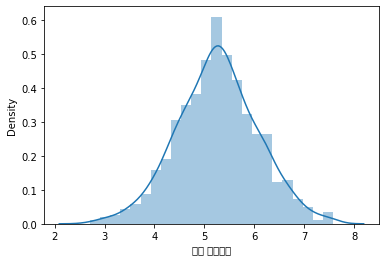

In [43]:
df["평균 구매주기"] = np.log1p(df["평균 구매주기"])  #log :평균보다 주기가 넓기에 베타값을 구하고자 하는 조치
sns.distplot(df["평균 구매주기"])

In [1]:
df.columns

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num = ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '구매카테고리수',' Frequency', 'Monetary']
cg = [ '구매금액대', '고객등급', '구매유형', '클레임접수여부','거주지역','성별', '고객 나이대']

In [ ]:
X = df[df.이탈여부 == 0][num+cg]
Y = df[df.이탈여부 == 0]["평균 구매주기"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse=False), cg)])
ct.fit(X_train)
X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

print(X_train[0])

In [ ]:
from sklearn.linear_model import LinearRegressin
from sklearn.metrics import mean_squared_error
from math import sqrt

lr = LinearRegression().fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2: {:.3f}".format(lr.score(X_train, Y_train)))
print("test R2: {:.3f}".format(lr.score(X_train, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}". format(rmse))

In [ ]:
#num = ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '구매카테고리수',' Frequency', 'Monetary']
#cg = [ '구매금액대', '고객등급', '구매유형', '클레임접수여부','거주지역','성별', '고객 나이대']

print("절편",np.round(lr.intercept_,3))
print("가중치(beta)", np.round(lr.coef_,3))

# ㅛ= 절편 + 가중치(BETA) 값 *총매출액 +0.06 -0.003 -0.002 +0.009 -0.057 +0.002 +0.045
# Y= 1.813+(-0.024)총매출액 +  +  ....